# Matrix Operations for ML

### Singular Value Decomposition(SVD)

A = UDV<sup>T</sup>

Where:

* U is an orthogonal `m x m` matrix; its columns are the left-singular vectors of A.
* V is an orthogonal `n x n` matrix; its columns are the right-singular vectors of A.
* D is a diagonal `m x n` matrix; elements along its diagonal are the singular values of A.


In [7]:
import numpy as np

# TensorFlow
import tensorflow as tf
print(tf.__version__)

# PyTorch
import torch
print(torch.__version__)


import matplotlib.pyplot as plt

2.17.0
2.5.1


In [8]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [9]:
U, d, VT = np.linalg.svd(A) # V is already transposed
print(f"U: {U}\n")
print(f"d: {d}\n")
print(f"VT: {VT}")

U: [[ 0.12708324  0.47409506  0.87125411]
 [ 0.00164602 -0.87847553  0.47778451]
 [ 0.99189069 -0.0592843  -0.11241989]]

d: [8.66918448 4.10429538]

VT: [[ 0.55798885  0.82984845]
 [-0.82984845  0.55798885]]


In [10]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

 D must have the same dimensions as A for UDV<sup>T</sup> matrix multiplication to be possible:

In [11]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [12]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

## Image Compression via SVG

In [13]:
from PIL import Image
%pip install wget
import wget as wget

Note: you may need to restart the kernel to use updated packages.


In [14]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

--2024-12-10 19:49:03--  https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 419564 (410K) [image/jpeg]
Saving to: ‘oboe-with-book.jpg.1’

oboe-with-book.jpg.  15%[==>                 ]  64.00K  4.06KB/s    eta 1m 48s ^C


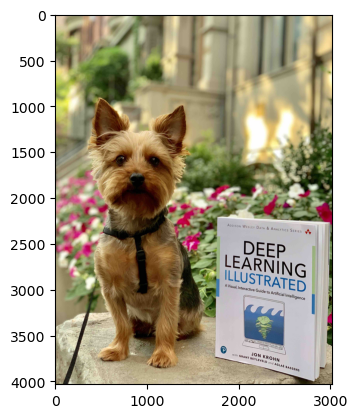

In [15]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels:

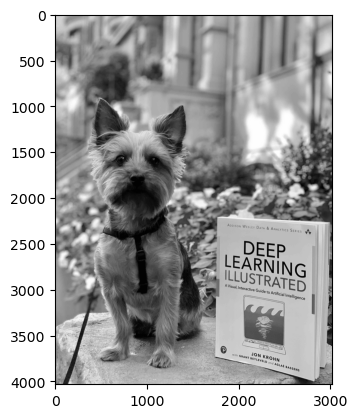

In [16]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convert data into numpy matrix, which doesn't impact image data:


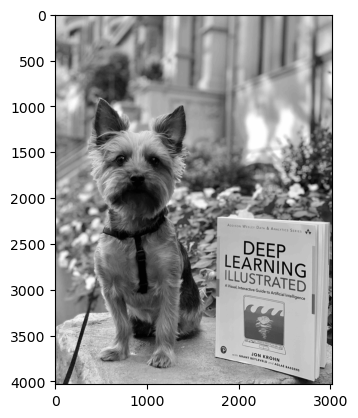

In [17]:

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calculate SVD of the image:

In [18]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag() so too are singular values, by convention, arranged in descending order in  (or, in this code, diag()). Thus, the first left-singular vector of  and first right-singular vector of  may represent the most prominent feature of the image:

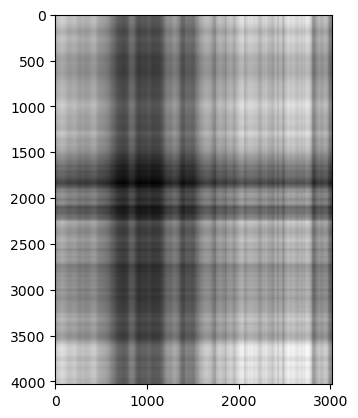

In [19]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

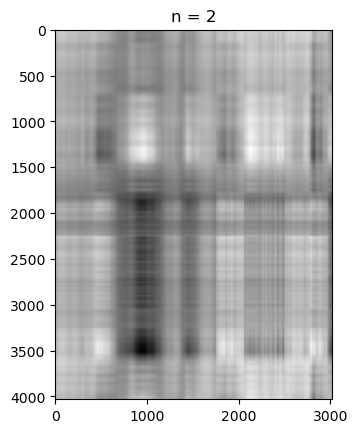

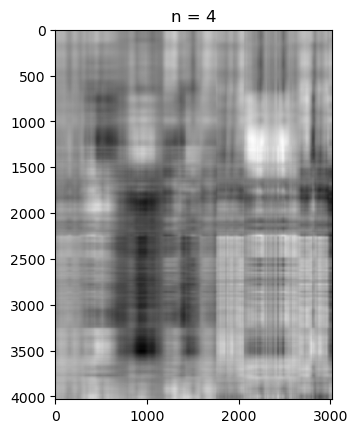

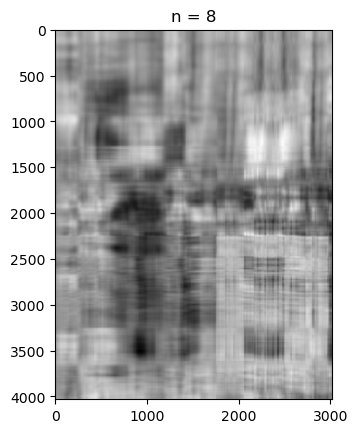

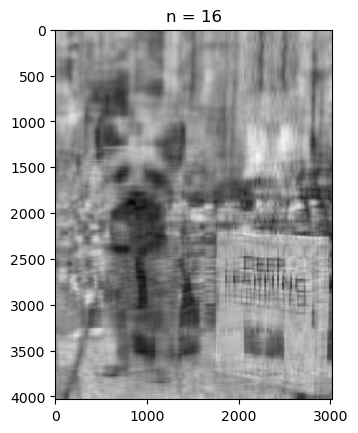

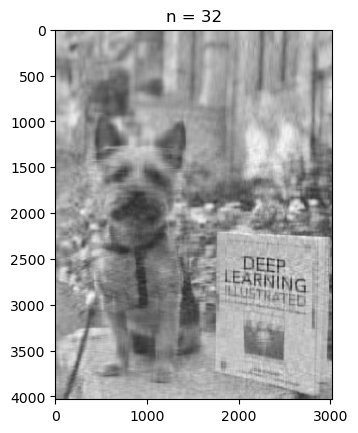

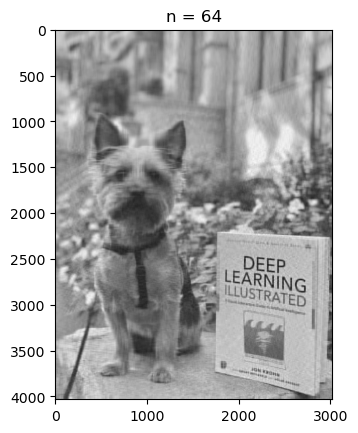

In [20]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [21]:
imgmat.shape

(4032, 3024)

In [23]:
full_representation = 4032*3024
full_representation

12192768

In [24]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

451648

In [25]:
svd64_rep/full_representation

0.037042286050222556

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original!

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.

## The Moore Penrose Pseudoinverse

Let's calculate the pseudoinverse A<sup>+</sup> of some matrix A using the formula from the slides:

A<sup>+</sup> = V D<sup>+</sup> U<sup>T</sup>


In [26]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [28]:
U, d, VT = np.linalg.svd(A)
print(f"U: {U}\n")
print(f"VT: {VT}\n")
print(f"d: {d}")

U: [[ 0.12708324  0.47409506  0.87125411]
 [ 0.00164602 -0.87847553  0.47778451]
 [ 0.99189069 -0.0592843  -0.11241989]]

VT: [[ 0.55798885  0.82984845]
 [-0.82984845  0.55798885]]

d: [8.66918448 4.10429538]


To create D<sup>+</sup>, we first invert the non-zero values of d:

In [29]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [30]:
print(1/8.669)
print(1/4.104)

0.11535355865728457
0.24366471734892786


...and then we would take the tranpose of the resulting matrix.

Because D is a diagonal matrix, this can, however, be done in a single step by inverting D:

In [31]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

D<sup>+</sup> must have the same dimensions as A<sup>T</sup> in order for V D<sup>+</sup> U<sup>T</sup> matrix multiplication to be possible:

In [32]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [33]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Working out this derivation is helpful for understanding how Moore-Penrose pseudoinverses work, but unsurprisingly NumPy is loaded with an existing method pinv():

In [34]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

### Now lets find the unknowns for a regression problem

For regression problems, we typically have many more cases (n, or rows of X) than features to predict (columns of X). Let's solve a miniature example of such an overdetermined situation.

We have eight data points (n = 8):

In [35]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [36]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

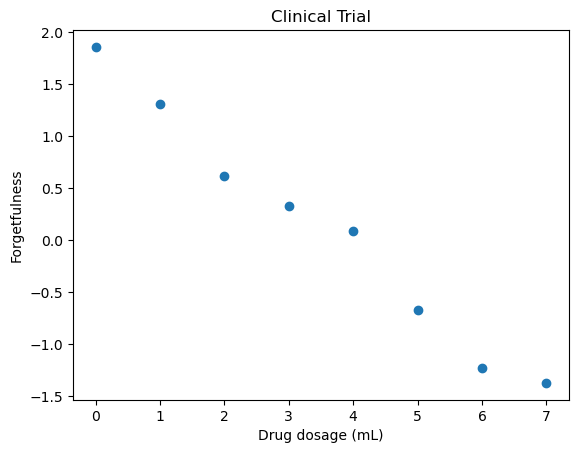

In [37]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Although it appears there is only one predictor (x<sub>1</sub>), our model requires a second one (let's call it x<sub>0</sub>) in order to allow for a y-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The y-intercept is constant across all the points so we can set it equal to 1 across the board:

In [38]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])


Concatenate x<sub>1</sub> and x<sub>0</sub> into a matrix X:

In [39]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

From the slides, we know that we can calculate the weights w using the equation:

w = X<sup>+</sup> y:

In [40]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

The first weight corresponds to the y-intercept of the line, which is typically denoted as b:

In [41]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999993

While the second weight corresponds to the slope of the line, which is typically denoted as m:

In [42]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857143

With the weights we can plot the line to confirm it fits the points:

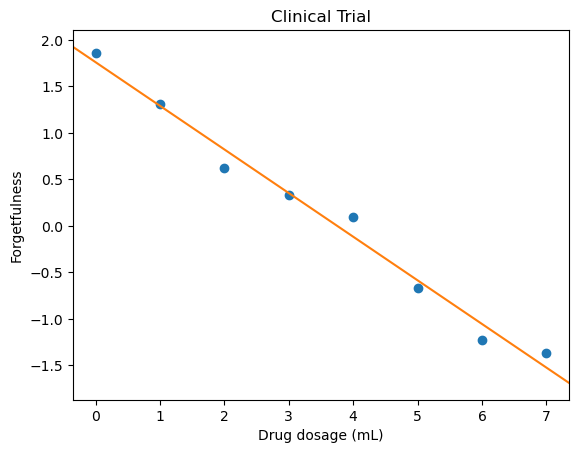

In [43]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

### The Trace Matrix

In [48]:
A_pt = torch.tensor([[-1, 2],[3, -2],[5, 7.]])
A_pt

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [50]:
F_N = torch.norm(A_pt)
F_N

tensor(9.5917)

In [51]:
F_N_T = torch.sqrt(torch.trace(torch.matmul(A_pt, A_pt.T)))
F_N_T

tensor(9.5917)

Thus proving the eq:

||A||<sub>F</sub> = $\sqrt{Tr(AA^T)}$

## Principal Component Analysis(PCA)

In [52]:
from sklearn import datasets
iris = datasets.load_iris()

In [53]:
iris.data.shape

(150, 4)

In [54]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [59]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=2)

In [62]:
X = pca.fit_transform(iris.data)

In [63]:
X.shape

(150, 2)

In [64]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

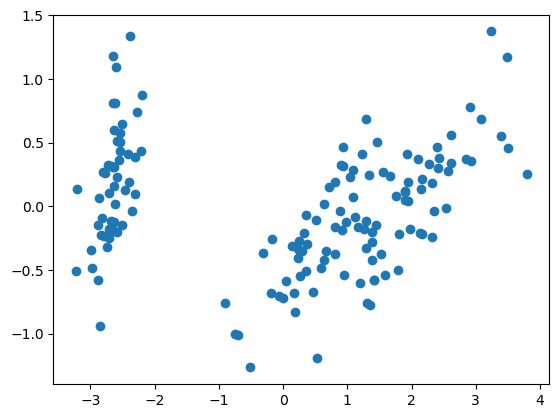

In [65]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [66]:
iris.target.shape

(150,)

In [67]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [68]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

In [69]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

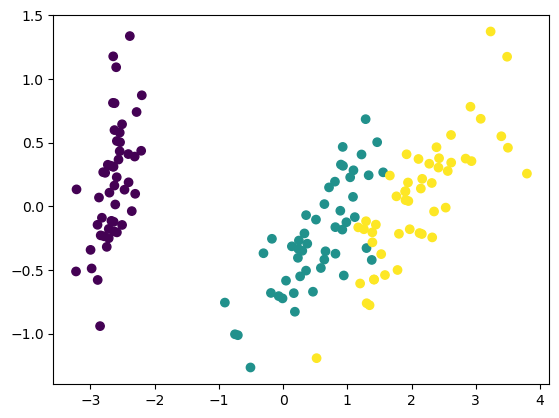

In [70]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)